# EDA Layer

## **Description:**

- Now we are going to attend a new DS step - **Exploratory Data Analysis**. We want to produce ML model for a business problem but are still unfamiliar with the underlying processes. Now, we have an opportunity to tackle this problem, 
- You need to explore your data to answer the following questions:
    - What I'm working with ?
    - What are the main patterns and tendencies with my data ?
    - How do my data entities interact ?
    - What should I do with my data to obtain good features ?
    - What are the problems with the probable prediction ?
    - How could I manually make predict based on data ? 


## **Possible Tools:**

- Data visualisation - seaborn, plotly, matplotlib
- Data processing - pandas, numpy, statsmodels, scikit-learn 
- Whatever you might find useful

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')
import scripts.eda as eda # eda.py module

In [2]:
train_df = pd.read_csv('../data/merged_train.csv')

train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.0,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.0,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,899.0,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        int64  
 6   month               int64  
 7   year                int64  
 8   item_name           object 
 9   item_category_id    int64  
 10  item_category_name  object 
 11  shop_name           object 
dtypes: float64(1), int64(7), object(4)
memory usage: 268.8+ MB


In [4]:
train_df['date'] = pd.to_datetime(train_df['date'])

int_columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_day', 'month', 'year', 'item_category_id']
float_columns = ['item_price']
object_columns = ['item_name', 'item_category_name', 'shop_name']

train_df = eda.transform_df_types(train_df, int_columns, float_columns, object_columns)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935848 entries, 0 to 2935847
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int32         
 2   shop_id             int32         
 3   item_id             int32         
 4   item_price          float32       
 5   item_cnt_day        int32         
 6   month               int32         
 7   year                int32         
 8   item_name           category      
 9   item_category_id    int32         
 10  item_category_name  category      
 11  shop_name           category      
dtypes: category(3), datetime64[ns](1), float32(1), int32(7)
memory usage: 123.9 MB


## We can analyze data sequentially column by column. Let's start with **date**

## **date** feature

In [5]:
train_df['date_month'] = train_df['date'].dt.month
train_df['date_year'] = train_df['date'].dt.year
train_df.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year
0,2013-01-02,0,59,22154,999.0,1,0,0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир""",1,2013
1,2013-01-03,0,25,2552,899.0,1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013
2,2013-01-05,0,25,2552,899.0,-1,0,0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум""",1,2013


Look at trend lines for each year

<Axes: xlabel='date_month', ylabel='item_cnt_day'>

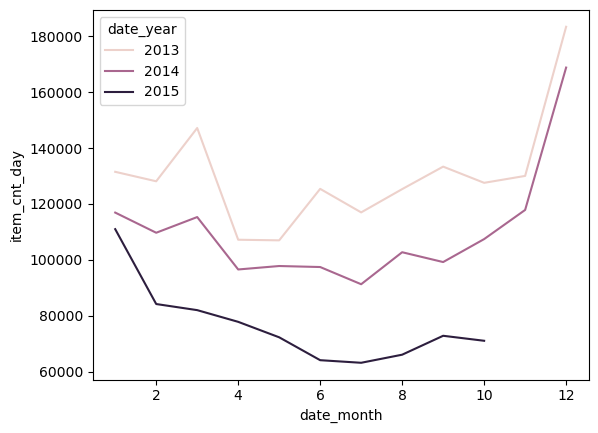

In [6]:
train_year_month = train_df.groupby(['date_year', 'date_month']).agg({'item_cnt_day': 'sum'}).reset_index()

sns.lineplot(x='date_month', y='item_cnt_day', hue='date_year', data=train_year_month)

Text(0, 0.5, 'Sales Amount')

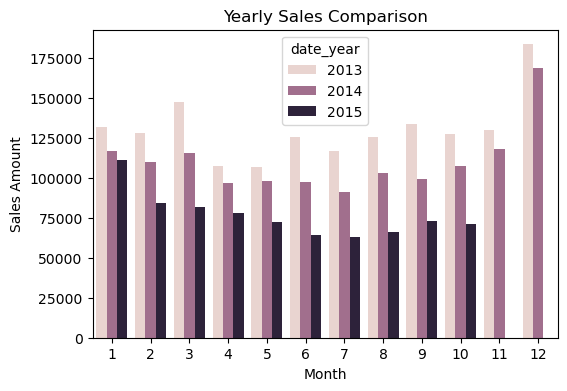

In [7]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x='date_month', y='item_cnt_day', hue='date_year', data=train_year_month)
plt.title("Yearly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Sales Amount")

The number of shop visits per year

In [8]:
train_df.groupby(['date_year'])['date'].count()

date_year
2013    1267561
2014    1055861
2015     612426
Name: date, dtype: int64

Average number of items sold during one visit per year

In [9]:
train_df.groupby(['date_year'])['item_cnt_day'].sum() / train_df.groupby(['date_year'])['date'].count()

date_year
2013    1.232865
2014    1.251007
2015    1.248451
dtype: float64

Now we can notice, that as the year number increases, the whole number of items sold per month decreases (while the trend lines look very similar).
From one point of view, this may be the result of the number of purchase observations decreasing by 16.7% in 2014 comparing to 2013. I believe, it doesn't
refer to data collecting issues and all the data is complete. What's more, the average number of items sold during one visit per year increased a little, so this may be just a small change in behavior of customers :)

### And in general, **month** and **year** are truly informative for future predictions because of the trend observed as well as the number of items sold reduction.

## Look at outliers

## **item_cnt_day** feature

Plot histogram and boxplot

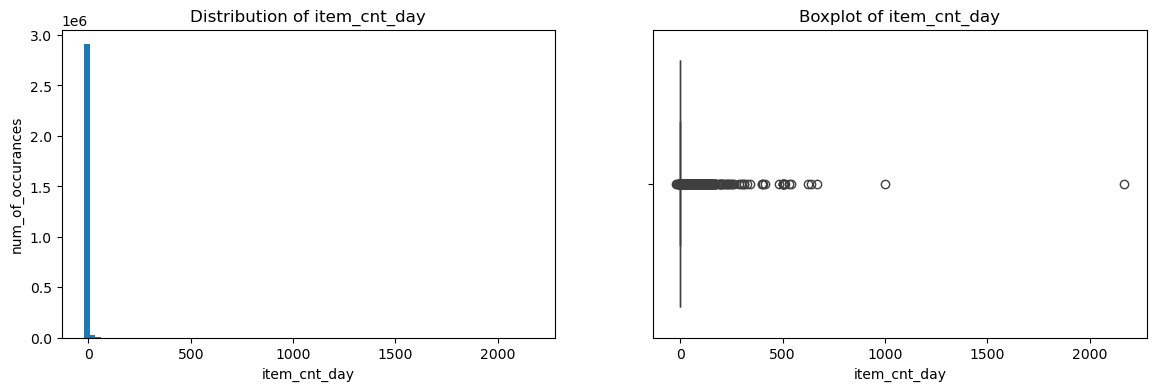

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.hist(train_df['item_cnt_day'], bins=80)
ax1.set_xlabel('item_cnt_day')
ax1.set_ylabel('num_of_occurances')
ax1.set_title('Distribution of item_cnt_day')

ax2.set_title("Boxplot of item_cnt_day")
sns.boxplot(x=train_df['item_cnt_day'])
plt.show()

Let's look at other features of corresponding objects

In [11]:
train_df.sort_values('item_cnt_day', ascending=False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year
2909817,2015-10-28,33,12,11373,0.908714,2169,9,2,Доставка до пункта выдачи (Boxberry),9,Доставка товара,Интернет-магазин ЧС,10,2015
2326929,2015-01-15,24,12,20949,4.000000,1000,0,2,Фирменный пакет майка 1С Интерес белый (34*42)...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши",Интернет-магазин ЧС,1,2015
2864234,2015-09-30,32,12,9248,1692.526123,669,8,2,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) [...",80,Служебные - Билеты,Интернет-магазин ЧС,9,2015
2851090,2015-09-30,32,55,9249,1702.825806,637,8,2,"Билет ""ИгроМир 2015"" - 3 октября 2015 (сайт) У...",8,Билеты (Цифра),Цифровой склад 1С-Онлайн,9,2015
2608039,2015-04-14,27,12,3731,1904.548096,624,3,2,"Grand Theft Auto V [PC, русские субтитры]",30,Игры PC - Стандартные издания,Интернет-магазин ЧС,4,2015


It's clear that all these objects contain real world data and don't have mistakes: high daily sales of an online shop don't look unexpected. 

Let's try to perform log transformation of **item_cnt_day** feature 

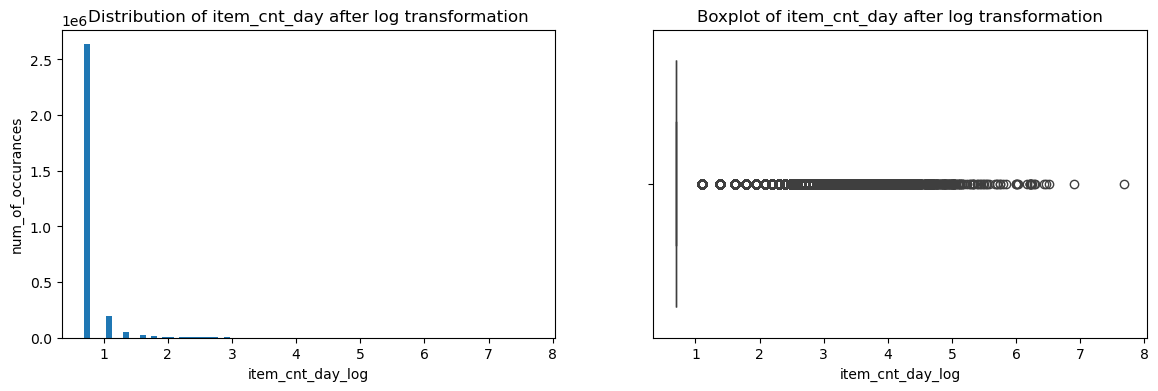

In [12]:
train_df['item_cnt_day_log'] = np.log(np.abs(train_df['item_cnt_day']) + 1) # add 1 to avoid log(0)

# plot histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.hist(train_df['item_cnt_day_log'], bins=80)
ax1.set_xlabel('item_cnt_day_log')
ax1.set_ylabel('num_of_occurances')
ax1.set_title('Distribution of item_cnt_day after log transformation')

ax2.set_title("Boxplot of item_cnt_day after log transformation")
sns.boxplot(x=train_df['item_cnt_day_log'])
plt.show()

Log transformation doesn't make data look closer to normal distribution. I'll leave outliers in the dataset for now and check how their presence affects the predictions when training models.

## **item_price** feature

Plot histogram and boxplot

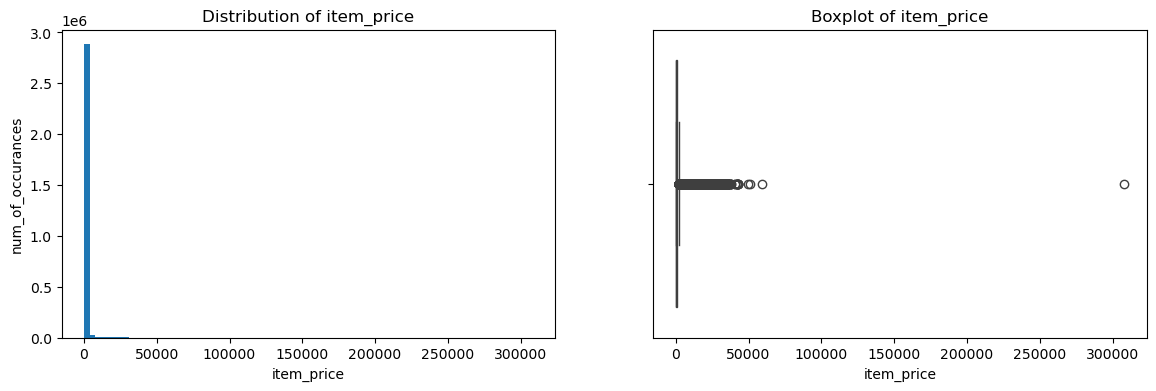

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.hist(train_df['item_price'], bins=80)
ax1.set_xlabel('item_price')
ax1.set_ylabel('num_of_occurances')
ax1.set_title('Distribution of item_price')

ax2.set_title("Boxplot of item_price")
sns.boxplot(x=train_df['item_price'])
plt.show()

Let's look at other features of corresponding objects

In [14]:
train_df.sort_values('item_price', ascending=False).head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,year,item_name,item_category_id,item_category_name,shop_name,date_month,date_year,item_cnt_day_log
1163157,2013-12-13,11,12,6066,307980.0,1,11,0,Radmin 3 - 522 лиц.,75,Программы - Для дома и офиса,Интернет-магазин ЧС,12,2013,0.693147
885137,2013-09-17,8,12,11365,59200.0,1,8,0,Доставка (EMS),9,Доставка товара,Интернет-магазин ЧС,9,2013,0.693147
1488134,2014-03-20,14,25,13199,50999.0,1,2,1,Коллекционные шахматы (Властелин Колец),69,Подарки - Сувениры,"Москва ТРК ""Атриум""",3,2014,0.693147
2327158,2015-01-29,24,12,7241,49782.0,1,0,2,UserGate Proxy & Firewall 6.X с модулем фильтр...,75,Программы - Для дома и офиса,Интернет-магазин ЧС,1,2015,0.693147
2931379,2015-10-20,33,22,13403,42990.0,1,9,2,"Комплект ""Microsoft Xbox One 1TB Limited Edit...",16,Игровые консоли - XBOX ONE,Москва Магазин С21,10,2015,0.693147


The prices are also reasonable - these outliers are definitely not mistakes.

Let's try to perform log transformation of **item_cnt_price** feature 

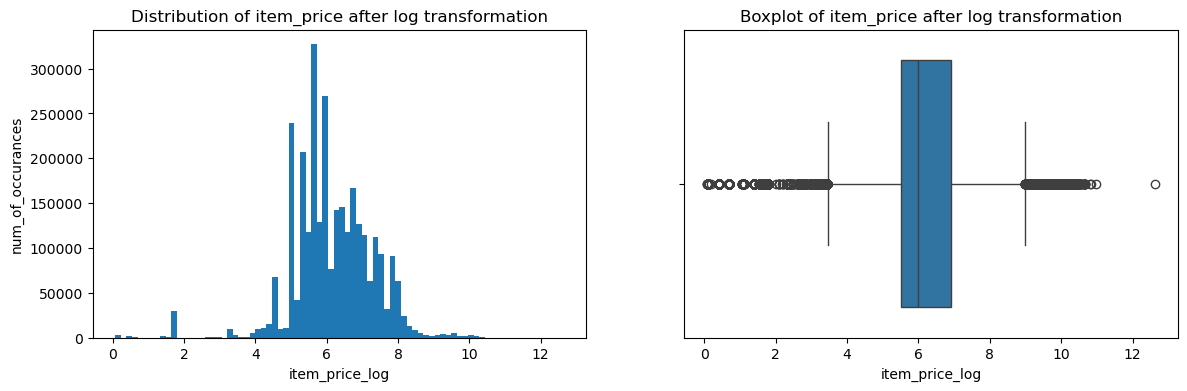

In [15]:
train_df['item_price_log'] = np.log(np.abs(train_df['item_price']) + 1) # add 1 to avoid log(0)

# plot histogram and boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.hist(train_df['item_price_log'], bins=80)
ax1.set_xlabel('item_price_log')
ax1.set_ylabel('num_of_occurances')
ax1.set_title('Distribution of item_price after log transformation')

ax2.set_title("Boxplot of item_price after log transformation")
sns.boxplot(x=train_df['item_price_log'])
plt.show()

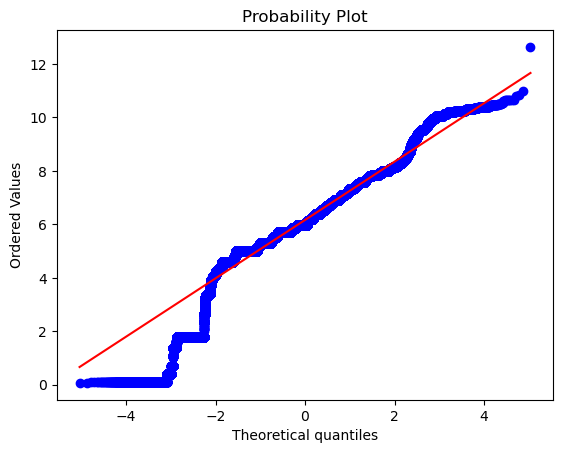

In [16]:
from scipy import stats

res = stats.probplot(train_df['item_price_log'], plot=plt)

The points form approximately a straight line except for the "outliers region" (ordered values under ~4, they can be seen on the boxplot above). 

I will keep **item_price_log** feature instead of the original **item_price** one for predictions

## Load and transform aggregated_train_df

In [17]:
aggregated_train_df = pd.read_csv('../data/merged_train_aggregated.csv')

int_columns = ['date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'month', 'year', 'item_category_id']
float_columns = ['item_price']
object_columns = ['item_name', 'item_category_name', 'shop_name']

aggregated_train_df = eda.transform_df_types(aggregated_train_df, int_columns, float_columns, object_columns)
aggregated_train_df['shop_city'] = aggregated_train_df['shop_name'].str.split(' ').str[0]

## **shop** features

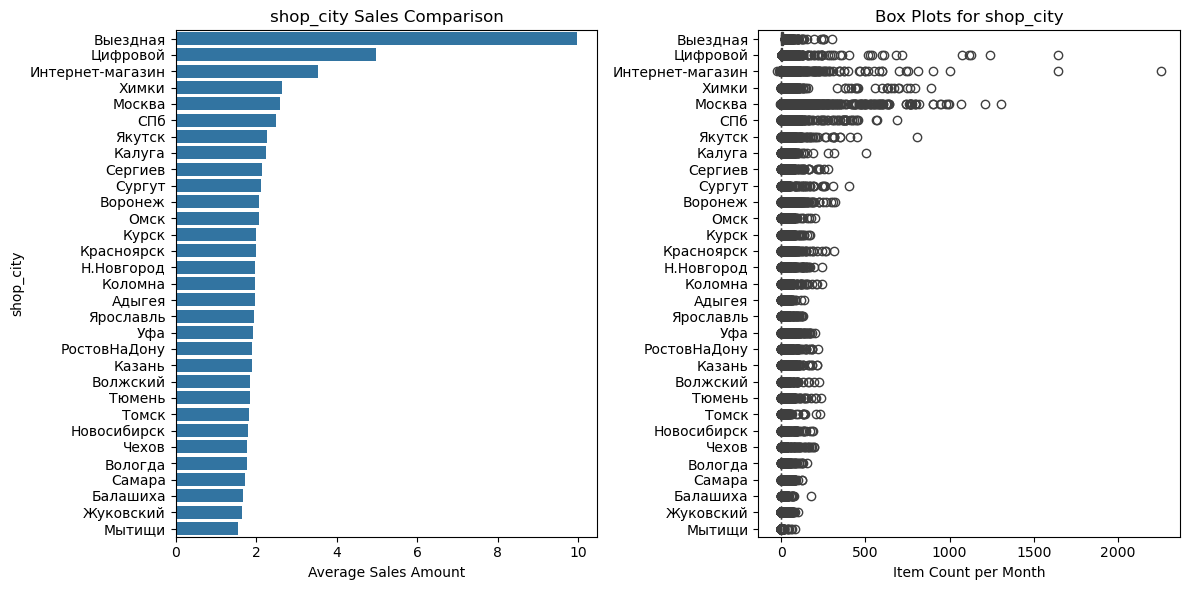

In [18]:
eda.plot_barpot_boxplot(aggregated_train_df, 'shop_city', figsize=(12, 6))

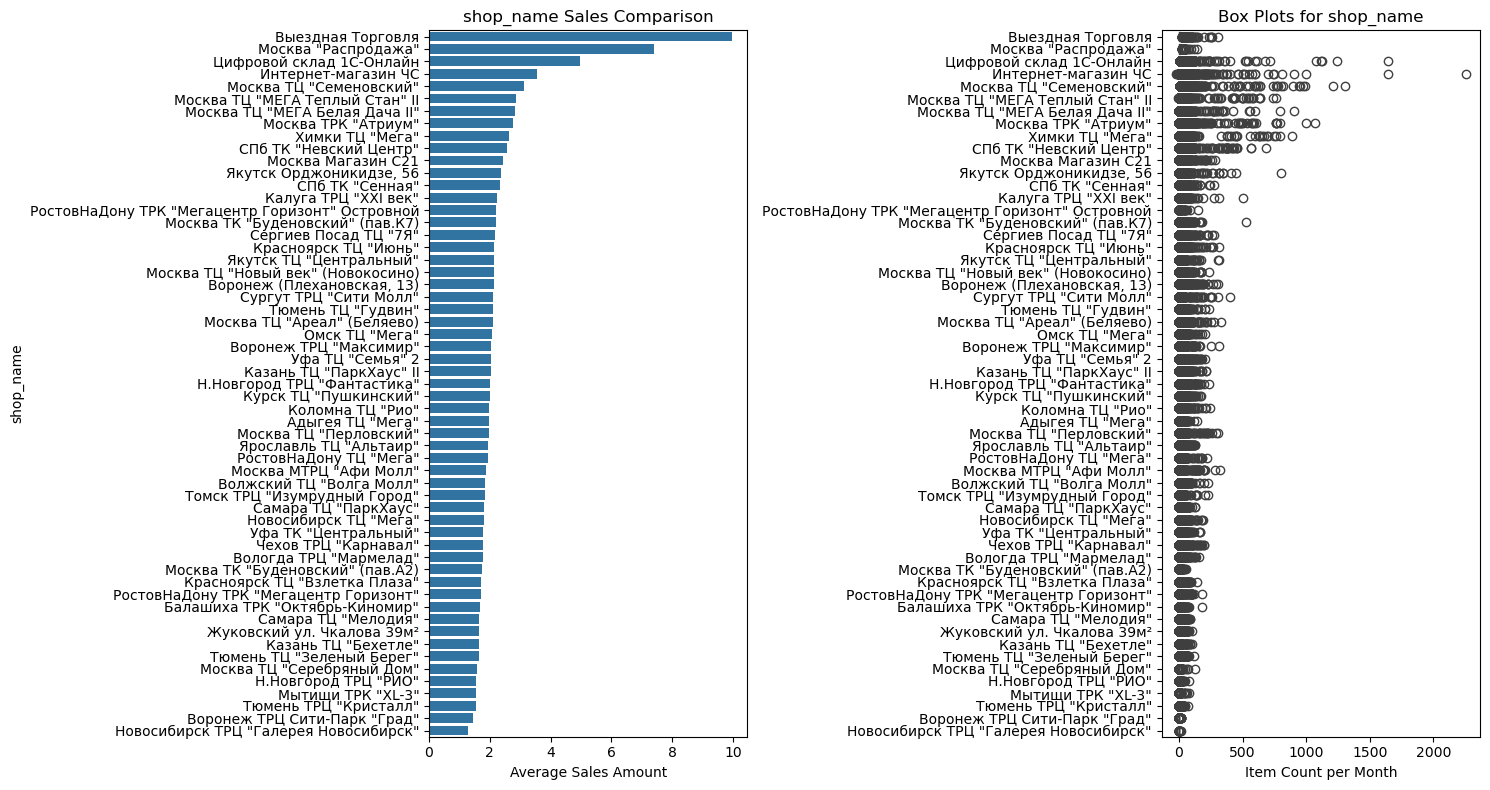

In [19]:
eda.plot_barpot_boxplot(aggregated_train_df, 'shop_name', figsize=(15, 8))

There are shops having significantly more sales than others. What's interesting, the top two of them are not in the top in terms of outliers.

## **item** features

Let's look at items with names, that can be considered strange (in this case, the ones containing special symbols like *, /, ! and so on)

In [20]:
import re

item_names = aggregated_train_df['item_name'].unique().tolist()
item_names_strange = [item_name for item_name in item_names if re.search(r'[^\w\s.,\-+=:()][/"]', item_name)]
item_names_strange

['Головоломка Дольче****/ Cast Dolce****  Арт. 476285',
 'Головоломка Мрамор****/ Cast Marble**** Арт. 473759',
 'Мини-головоломка 14**/ Mini Wire 14** Арт. 473314',
 'Мини-головоломка 9**/ Mini Wire 09** Арт. 473309',
 'Головоломка Виолин**/Cast Violin**',
 'Головоломка Сердце*****/ Cast Heart*****  Арт. 473787',
 'Головоломка Эква*****/ Cast Equa***** Арт. 473761',
 'Мини-головоломка 10***/ Mini Wire 10*** Арт. 473310',
 'Мини-головоломка 15*/ Mini Wire 15* Арт. 473315',
 'Мини-головоломка 17**/ Mini Wire 17** Арт. 473317',
 'Мини-головоломка 18**/ Mini Wire 18** Арт. 473318',
 'Мини-головоломка 3**/ Mini Wire 03** Арт. 473303',
 'Мини-головоломка 8*/ Mini Wire 08* Арт. 473308',
 'Головоломка Дуэт******/ Cast Duet******  Арт. 473769',
 'Головоломка Колодец***/ Cast Coil*** Арт. 473753',
 'Головоломка Кольцо****/ Cast Ring****  Арт. 473791',
 'Головоломка Кольцо-2*****/ Cast Ring 11*****  Арт. 473792',
 'Головоломка Лось***/Leonardo Bull*** ар. 362012',
 'Головоломка Подкова**/ Cast H

In [21]:
print("The quantity of such items:", len(item_names_strange))

The quantity of such items: 103


Second group of unusual item names - those that start with a special symbol

In [22]:
item_names = aggregated_train_df['item_name'].unique().tolist()
item_names_strange = [item_name for item_name in item_names if not item_name[0].isalpha() and not item_name[0].isdigit()]
item_names_strange

['/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72',
 '*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь',
 '!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]',
 '***ГОЛУБАЯ ВОЛНА  (Univ)                      D',
 '***УДАР ПО ВОРОТАМ (UNI)               D',
 '/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/               D',
 '***В ЛУЧАХ СЛАВЫ   (UNV)                    D',
 '***ЧАЙ С МУССОЛИНИ                     D',
 '***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D',
 '/ОДНАЖДЫ В КИТАЕ-2',
 '/ТЫ  - ТРУП',
 '//НЕ ОСТАВЛЯЮЩИЙ СЛЕДА (Регион)',
 '! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D',
 '***КОРОБКА (СТЕКЛО)                       D',
 '*СПАСАЯ ЭМИЛИ                           D',
 '/ПОСЛЕДНИЙ ШАНС',
 '//МОНГОЛ С.Бодров (Регион)',
 '/УМНОЖАЮЩИЙ ПЕЧАЛЬ т.2 (сер.3-4)',
 '*ЛИНИЯ СМЕРТИ                           D',
 '//АДРЕНАЛИН: ОДИН ПРОТИВ ВСЕХ (Регион)',
 '***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)             D',
 '***УДАР ПО ВОРОТАМ-2 (UNI)               D',
 '*ЧОКНУТЫЙ ПРОФЕССОР /МАГИЯ/             D',
 '*ЗА ГРАНЬЮ СМЕРТИ             

Third group of unusual item names - those that end with "      D"

In [23]:
item_names_strange_D = [item_name for item_name in item_names if item_name.endswith('  D')]
train_strange_names = aggregated_train_df[aggregated_train_df['item_name'].isin(item_names_strange_D)]
train_strange_names[['item_name', 'item_cnt_month', 'item_price']]

,item_name,item_cnt_month,item_price
1013109,***ГОЛУБАЯ ВОЛНА (Univ) D,1,100.0
1013110,***УДАР ПО ВОРОТАМ (UNI) D,1,100.0
1033745,/БОМБА ДЛЯ НЕВЕСТЫ /2DVD/ D,1,58.0
1059283,***В ЛУЧАХ СЛАВЫ (UNV) D,1,58.0
1059284,***ГОЛУБАЯ ВОЛНА (Univ) D,1,58.0
1059285,***ЧАЙ С МУССОЛИНИ D,1,58.0
1059286,***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI) D,1,58.0
1101022,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,1,58.0
1101023,***КОРОБКА (СТЕКЛО) D,1,58.0
1101024,***ЧАЙ С МУССОЛИНИ D,1,58.0


(Un)fortunately I see nothing strange in items ending with "    D" or starting with "*" or "/"or "!". Especially when there is < 30 of them. 

However, I'm sure, that all these symbols do tell us some information about a particular item:

- Asterisk * in the beginning may be used to emphasize the importance of an item - for example, **'\*МИХЕЙ И ДЖУМАНДЖИ  Сука любовь'** might refer to a special edition of the film. 
Moreover, the asterisks inside the item name can be used to shorten it or to illustrate the level of difficulty of a puzzle like there **'Головоломка Хеликс\*\*\*\**/Cast Helix\*\*\*\** Арт. 473757'**.
- Slash / possibly represents the name of the collection like there **'/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72'**.
- Exclamation mark ! might be used to mark software.
- " D" in the end of the name refers to the **DVD format** of the item.

Nevertheless, this information is still hardly useful for predictions, because of the small amount of observations and normal values if **"item_cnt_month"** and **"item_price"** features.

## **category** features

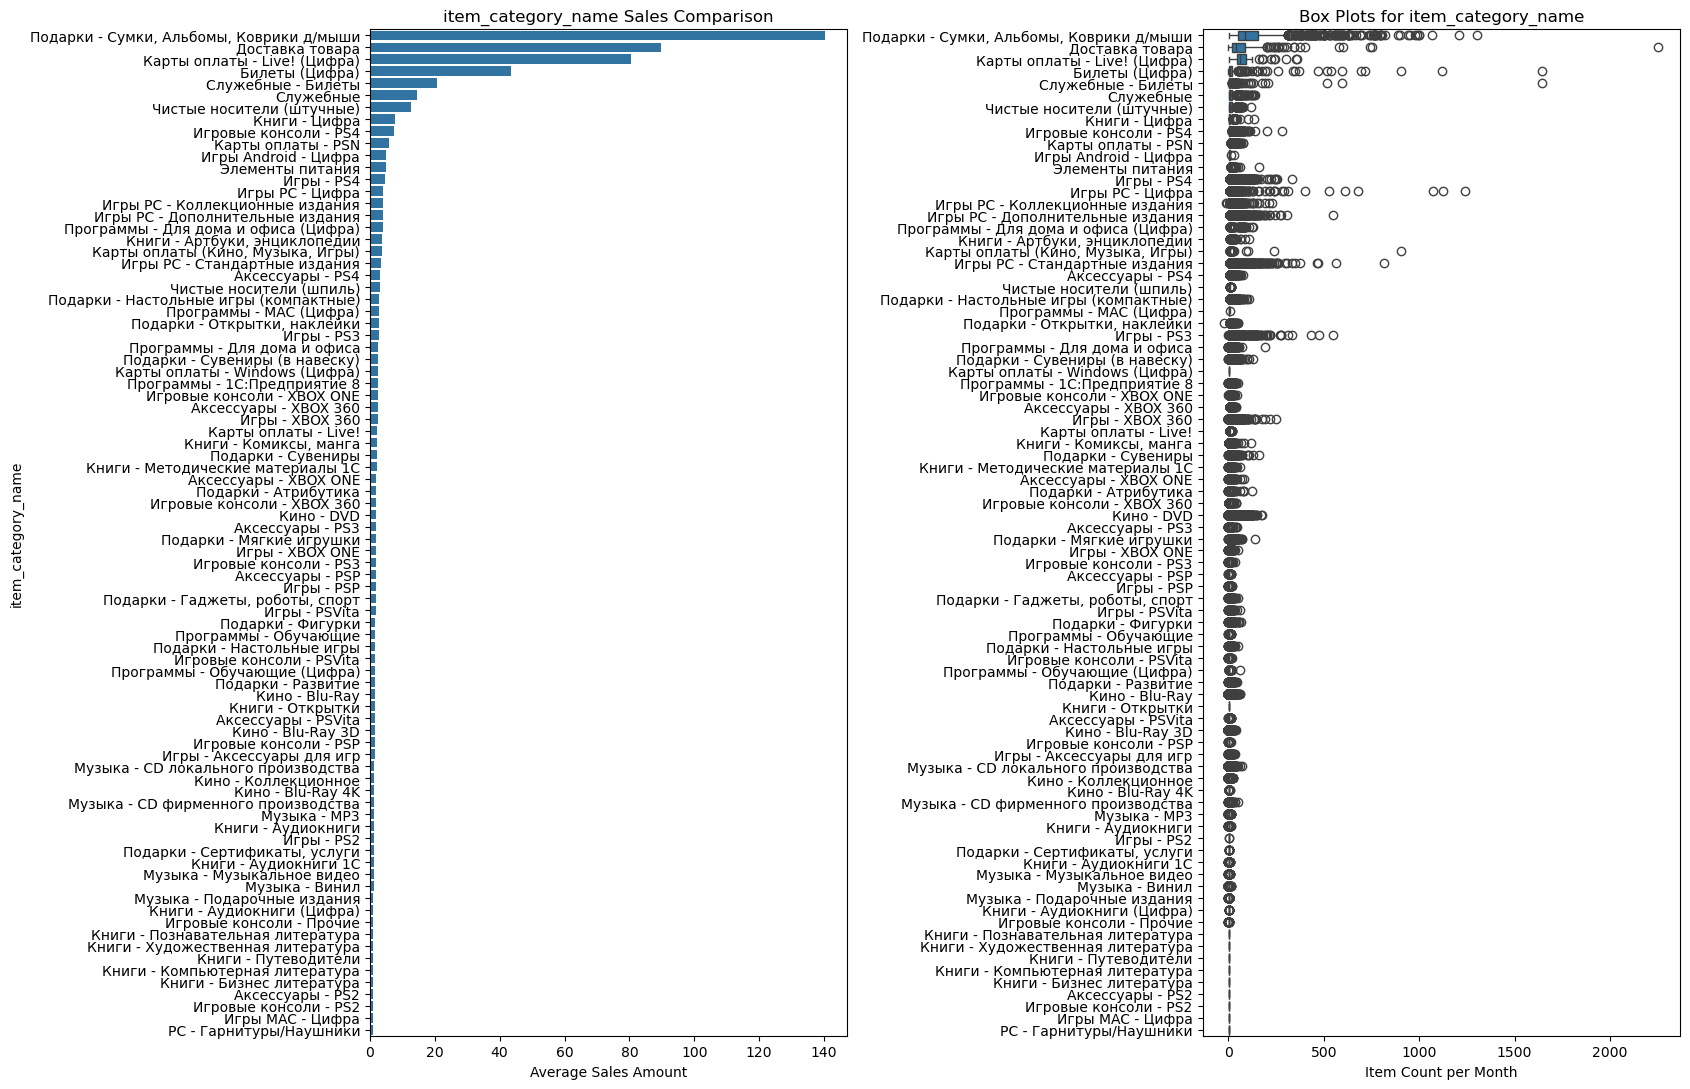

In [24]:
eda.plot_barpot_boxplot(aggregated_train_df, 'item_category_name', figsize=(17, 11))

### Look at the sales distribution along large categories of items

In [25]:
aggregated_train_df['large_category_name'] = train_df['item_category_name'].apply(lambda x: x.split(' - ')[0])
aggregated_train_df['large_category_name'].unique().tolist()

['Кино',
 'Музыка',
 'Игры',
 'Игры PC',
 'Программы',
 'Книги',
 'Подарки',
 'Аксессуары',
 'Игровые консоли',
 'Карты оплаты',
 'Чистые носители (штучные)',
 'Чистые носители (шпиль)',
 'Служебные',
 'PC',
 'Элементы питания',
 'Доставка товара',
 'Карты оплаты (Кино, Музыка, Игры)']

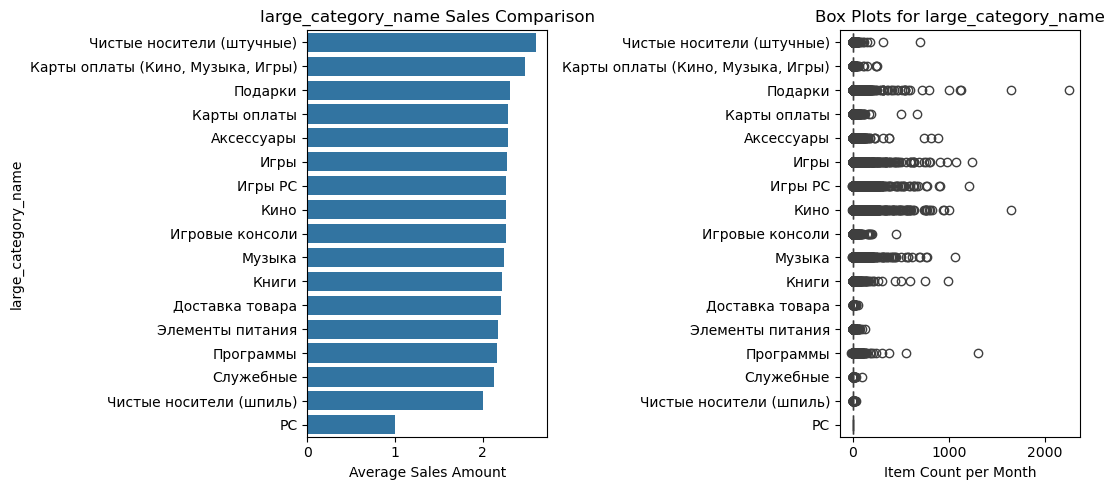

In [26]:
eda.plot_barpot_boxplot(aggregated_train_df, 'large_category_name', figsize=(11, 5))

## Load and transform test_df

In [27]:
test_df = pd.read_csv('../data/merged_test.csv')

test_df['large_category_name'] = test_df['item_category_name'].apply(lambda x: x.split(' - ')[0])
test_df['shop_city'] = test_df['shop_name'].apply(lambda x: x.split(' ')[0])

In [28]:
test_df

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,large_category_name,shop_city
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",Музыка,Вологда
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,"Вологда ТРЦ ""Мармелад""",Игры,Вологда
4,4,5,5268,"Need for Speed [PS4, русская версия]",20,Игры - PS4,"Вологда ТРЦ ""Мармелад""",Игры,Вологда
...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,СБ. Союз 55,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",Музыка,Самара
214196,214196,45,16188,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,"Самара ТЦ ""ПаркХаус""",Подарки,Самара
214197,214197,45,15757,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,"Самара ТЦ ""ПаркХаус""",Музыка,Самара
214198,214198,45,19648,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,"Самара ТЦ ""ПаркХаус""",Кино,Самара


## Check correlation with heatmap

<Axes: title={'center': 'Correlation between features'}>

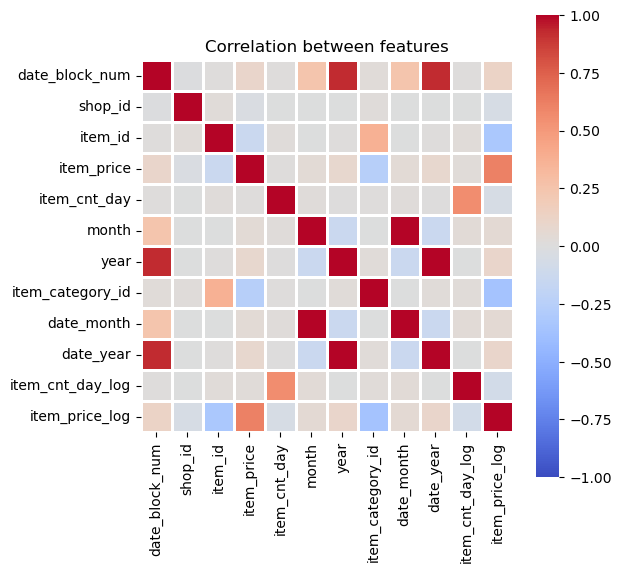

In [29]:
numeric_train_df = train_df.select_dtypes(include=np.number)
f, ax = plt.subplots()
f.set_size_inches(6, 6)
ax.set_title("Correlation between features")
sns.heatmap(numeric_train_df.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=2, square=True)

**year** and **date_block_num** features are highly correlated, but I'll leave **date_block_num** for now to use it for aggregation in the future "split into train, test, validation sets" operation

## Export resulting dataframes

In [30]:
test_df.head(3)

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,shop_name,large_category_name,shop_city
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,"Вологда ТРЦ ""Мармелад""",Музыка,Вологда
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,"Вологда ТРЦ ""Мармелад""",Игры,Вологда


## **Conclusion**

Summing all up, some of the main results of EDA Layer are:
1. There is periodicity across years as well as the decrease of **total sales** as **year** number increases. 
2. **"item_price"** feature gets symmetric distribution after performing log transformation => I replaced the original feature with the transformed one.
3. I will handle outliers in **"item_price"** and **"item_cnt_day"** features when building models - they may not affect model quality.
4. Some shops, cities and categories are significantly more popular than others => I created categorical variables that reflect this.
5. To extract some information from **"item_price"** feature, I calculated average price for each "item-shop" pair and filled missing values with average category price.
6. Added lag features for **"item_cnt_month"** column.
7. Found out some strange item and shop names and transformed some of them.